In [2]:
import pandas as pd

# 파일 읽기
df = pd.read_csv("final_ultimate_log_replaced.csv")

# 기본 정보 확인
print(f"행: {len(df)}, 열: {len(df.columns)}")
print("\n컬럼명:")
print(df.columns.tolist())
print("\n처음 5행:")
print(df.head())

행: 3361, 열: 66

컬럼명:
['hr_unit_artmp', 'hr_unit_hum', 'land_area', 'forest_area', 'growing_stock', 'forest_ratio', 'avg_growing_stock', 'u10_mean_ms', 'v10_mean_ms', 'wind_dir_deg', 'tp_sum_mm', 'pev_sum_mm', 'impute_radius', 'ctpv_nm_gangwon', 'ctpv_nm_gyeonggi', 'ctpv_nm_gyeongnam', 'ctpv_nm_gyeongbuk', 'ctpv_nm_gwangju', 'ctpv_nm_daegu', 'ctpv_nm_daejeon', 'ctpv_nm_busan', 'ctpv_nm_seoul', 'ctpv_nm_sejong', 'ctpv_nm_ulsan', 'ctpv_nm_incheon', 'ctpv_nm_jeonnam', 'ctpv_nm_jeonbuk', 'ctpv_nm_jeju', 'ctpv_nm_chungnam', 'ctpv_nm_chungbuk', 'wndrct_brng_south', 'wndrct_brng_southeast', 'wndrct_brng_southwest', 'wndrct_brng_east', 'wndrct_brng_north', 'wndrct_brng_northeast', 'wndrct_brng_northwest', 'wndrct_brng_west', 'total_time', 'arrival_time_diff', 'dispatch_time_diff', 'golden_time_under_50min', 'is_night', 'wspd_bin_1', 'wspd_bin_2', 'wspd_bin_3', 'wspd_bin_4', 'wspd_bin_5', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import platform
import warnings

# 한글 폰트 설정
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = ['AppleGothic', 'Malgun Gothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨기기
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# matplotlib 폰트 관련 경고 숨기기
import matplotlib.font_manager as fm

warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')

if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# ... existing code ...

# 컬럼명과 데이터 타입 확인
print("=== 컬럼별 데이터 타입 ===")
print(df.dtypes)

print("\n=== 컬럼별 데이터 타입 상세 정보 ===")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

print("\n=== 컬럼별 고유값 개수 (카테고리형 변수 식별용) ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}개 고유값")

print("\n=== 컬럼별 결측값 개수 ===")
missing_counts = df.isnull().sum()
for col in df.columns:
    print(f"{col}: {missing_counts[col]}개 결측값")

=== 컬럼별 데이터 타입 ===
hr_unit_artmp        float64
hr_unit_hum          float64
land_area              int64
forest_area            int64
growing_stock          int64
                      ...   
frstn_grnds_dstnc    float64
dspt_req_hr          float64
relax_diff           float64
fire_supesn_hr       float64
wind_speed_mean      float64
Length: 66, dtype: object

=== 컬럼별 데이터 타입 상세 정보 ===
hr_unit_artmp: float64
hr_unit_hum: float64
land_area: int64
forest_area: int64
growing_stock: int64
forest_ratio: float64
avg_growing_stock: float64
u10_mean_ms: float64
v10_mean_ms: float64
wind_dir_deg: float64
tp_sum_mm: float64
pev_sum_mm: float64
impute_radius: int64
ctpv_nm_gangwon: int64
ctpv_nm_gyeonggi: int64
ctpv_nm_gyeongnam: int64
ctpv_nm_gyeongbuk: int64
ctpv_nm_gwangju: int64
ctpv_nm_daegu: int64
ctpv_nm_daejeon: int64
ctpv_nm_busan: int64
ctpv_nm_seoul: int64
ctpv_nm_sejong: int64
ctpv_nm_ulsan: int64
ctpv_nm_incheon: int64
ctpv_nm_jeonnam: int64
ctpv_nm_jeonbuk: int64
ctpv_nm_jeju: int6

=== 선택된 컬럼들의 기본 통계 ===

land_area:
  평균: 63947.38
  표준편차: 36980.77
  최솟값: 986.00
  최댓값: 182034.00
  중앙값: 63001.00

forest_area:
  평균: 41167.30
  표준편차: 30681.63
  최솟값: 74.00
  최댓값: 158948.00
  중앙값: 33552.00

forest_ratio:
  평균: 58.71
  표준편차: 17.18
  최솟값: 3.10
  최댓값: 96.56
  중앙값: 63.99

growing_stock:
  평균: 6861594.54
  표준편차: 5597140.65
  최솟값: 12034.00
  최댓값: 29236603.00
  중앙값: 5063345.00

avg_growing_stock:
  평균: 161.81
  표준편차: 16.75
  최솟값: 81.77
  최댓값: 193.18
  중앙값: 162.61


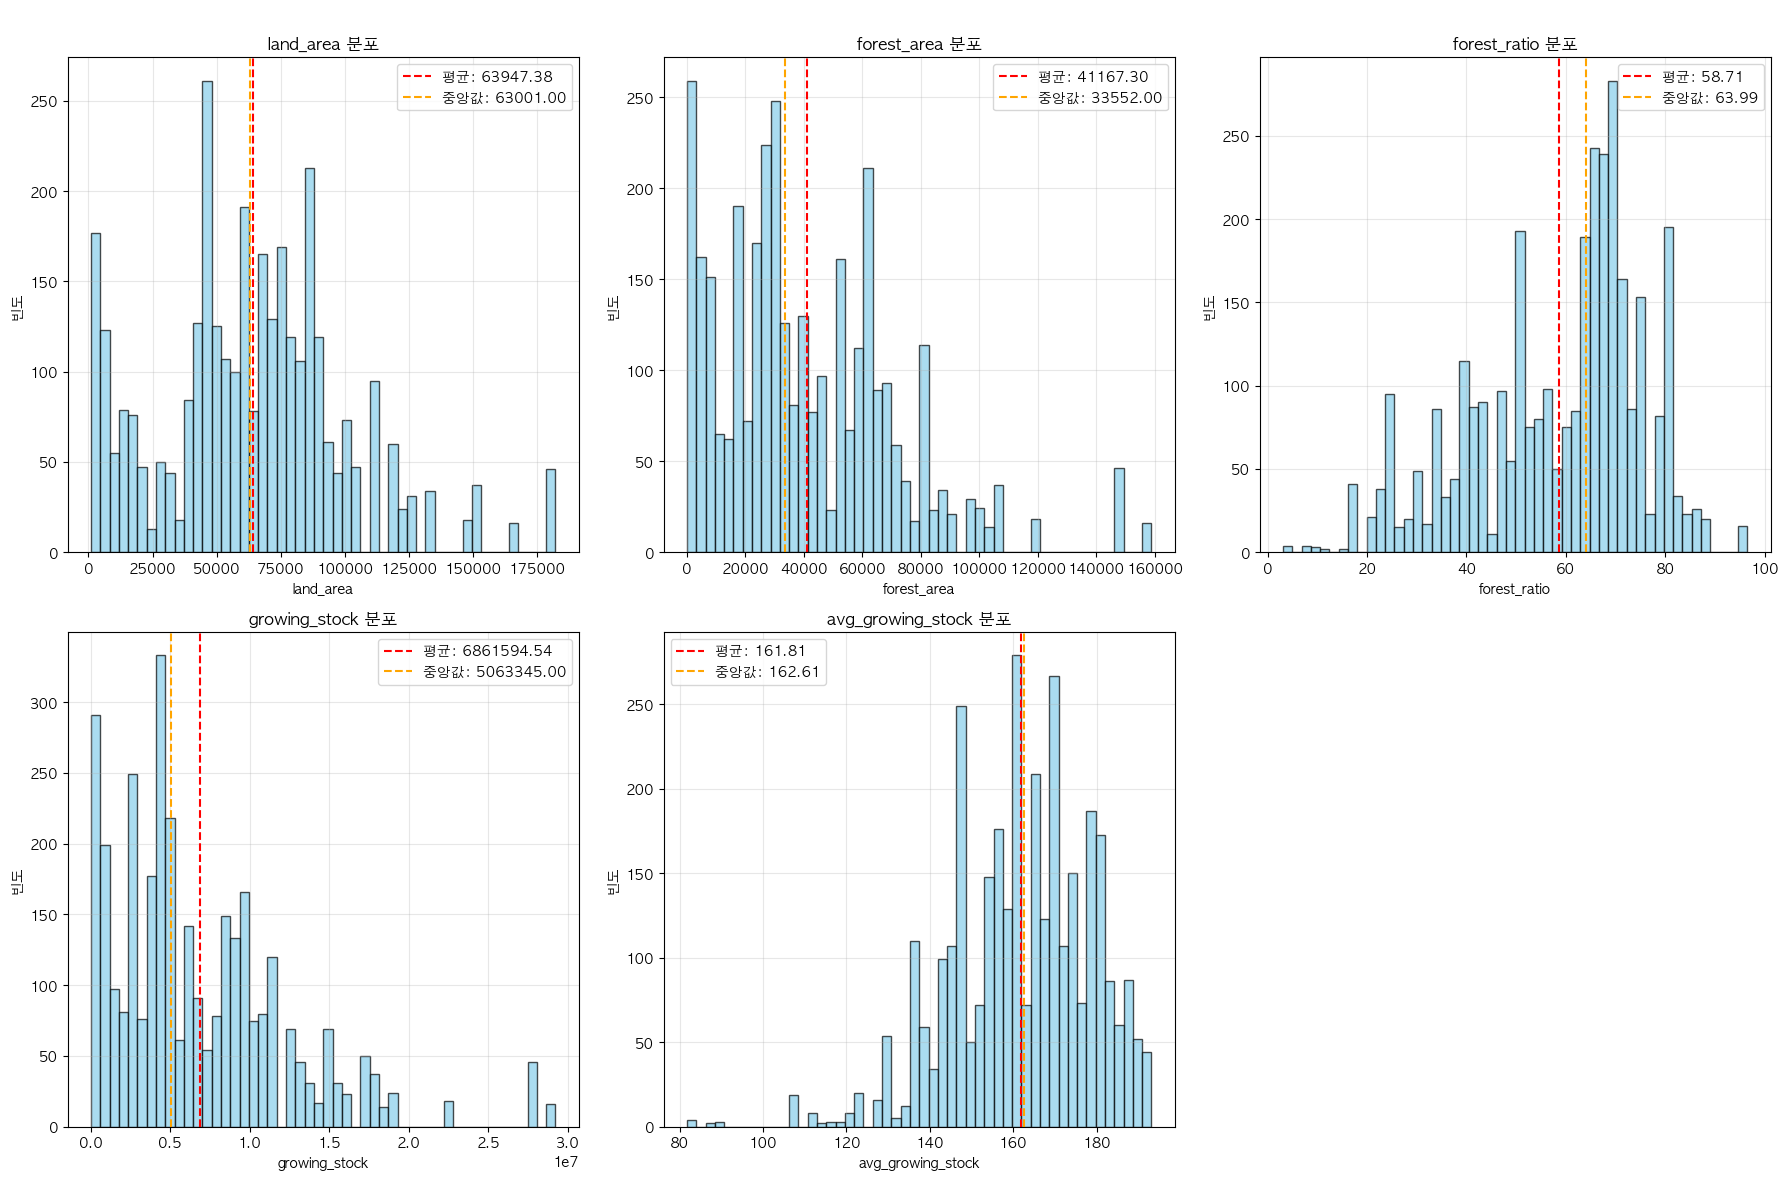


=== 상세 통계 요약 ===
           land_area    forest_area  forest_ratio  growing_stock  \
count    3361.000000    3361.000000   3361.000000   3.361000e+03   
mean    63947.377269   41167.299316     58.712696   6.861595e+06   
std     36980.766519   30681.634331     17.176790   5.597141e+06   
min       986.000000      74.000000      3.100000   1.203400e+04   
25%     43099.000000   17712.000000     46.720000   2.586497e+06   
50%     63001.000000   33552.000000     63.990000   5.063345e+06   
75%     86415.000000   60891.000000     70.340000   9.864674e+06   
max    182034.000000  158948.000000     96.560000   2.923660e+07   

       avg_growing_stock  
count        3361.000000  
mean          161.813532  
std            16.748468  
min            81.770000  
25%           150.150000  
50%           162.610000  
75%           174.730000  
max           193.180000  

=== 왜도와 첨도 ===
land_area:
  왜도: 0.492 (우편향)
  첨도: 0.547 (뾰족함)
forest_area:
  왜도: 1.055 (우편향)
  첨도: 1.534 (뾰족함)
forest_ratio:


In [5]:
# ... existing code ...

# 선택된 컬럼들의 분포 분석
selected_columns = ['land_area', 'forest_area', 'forest_ratio', 'growing_stock', 'avg_growing_stock']

# 통계 정보 출력
print("=== 선택된 컬럼들의 기본 통계 ===")
for col in selected_columns:
    print(f"\n{col}:")
    print(f"  평균: {df[col].mean():.2f}")
    print(f"  표준편차: {df[col].std():.2f}")
    print(f"  최솟값: {df[col].min():.2f}")
    print(f"  최댓값: {df[col].max():.2f}")
    print(f"  중앙값: {df[col].median():.2f}")

# 히스토그램 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(' ', fontsize=16, fontweight='bold')

for i, col in enumerate(selected_columns):
    row = i // 3
    col_idx = i % 3
    
    # 히스토그램
    axes[row, col_idx].hist(df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{col} 분포', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('빈도')
    
    # 평균선 추가
    mean_val = df[col].mean()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', 
                               label=f'평균: {mean_val:.2f}')
    
    # 중앙값선 추가
    median_val = df[col].median()
    axes[row, col_idx].axvline(median_val, color='orange', linestyle='--', 
                               label=f'중앙값: {median_val:.2f}')
    
    axes[row, col_idx].legend()
    axes[row, col_idx].grid(True, alpha=0.3)

# 마지막 subplot 제거 (5개 컬럼이므로 6개 subplot 중 하나는 비워둠)
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# 추가적인 통계 정보
print("\n=== 상세 통계 요약 ===")
print(df[selected_columns].describe())

# 왜도와 첨도 계산
print("\n=== 왜도와 첨도 ===")
for col in selected_columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col}:")
    print(f"  왜도: {skewness:.3f} ({'우편향' if skewness > 0 else '좌편향' if skewness < 0 else '대칭'})")
    print(f"  첨도: {kurtosis:.3f} ({'뾰족함' if kurtosis > 0 else '평평함' if kurtosis < 0 else '정상'})")

=== 상관계수 테이블 ===
fire_supesn_hr       1.000000
forest_ratio         0.270761
forest_area          0.262863
growing_stock        0.254018
land_area            0.246647
avg_growing_stock    0.093146
Name: fire_supesn_hr, dtype: float64

=== fire_supesn_hr와의 상관계수 (절댓값 기준 내림차순) ===
forest_ratio: 0.2708
forest_area: 0.2629
growing_stock: 0.2540
land_area: 0.2466
avg_growing_stock: 0.0931


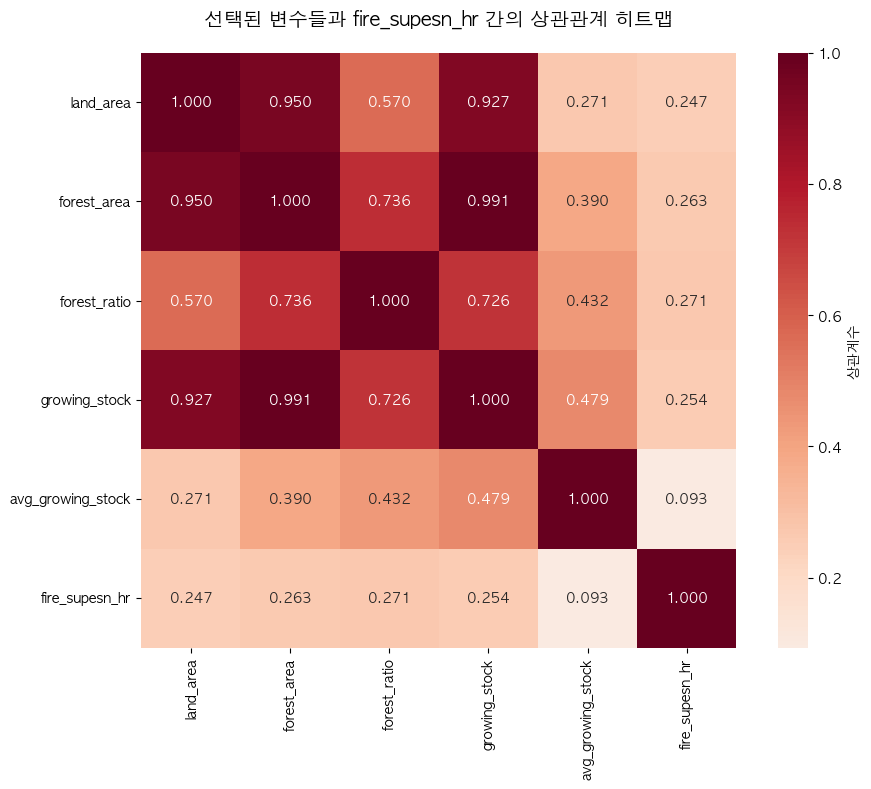

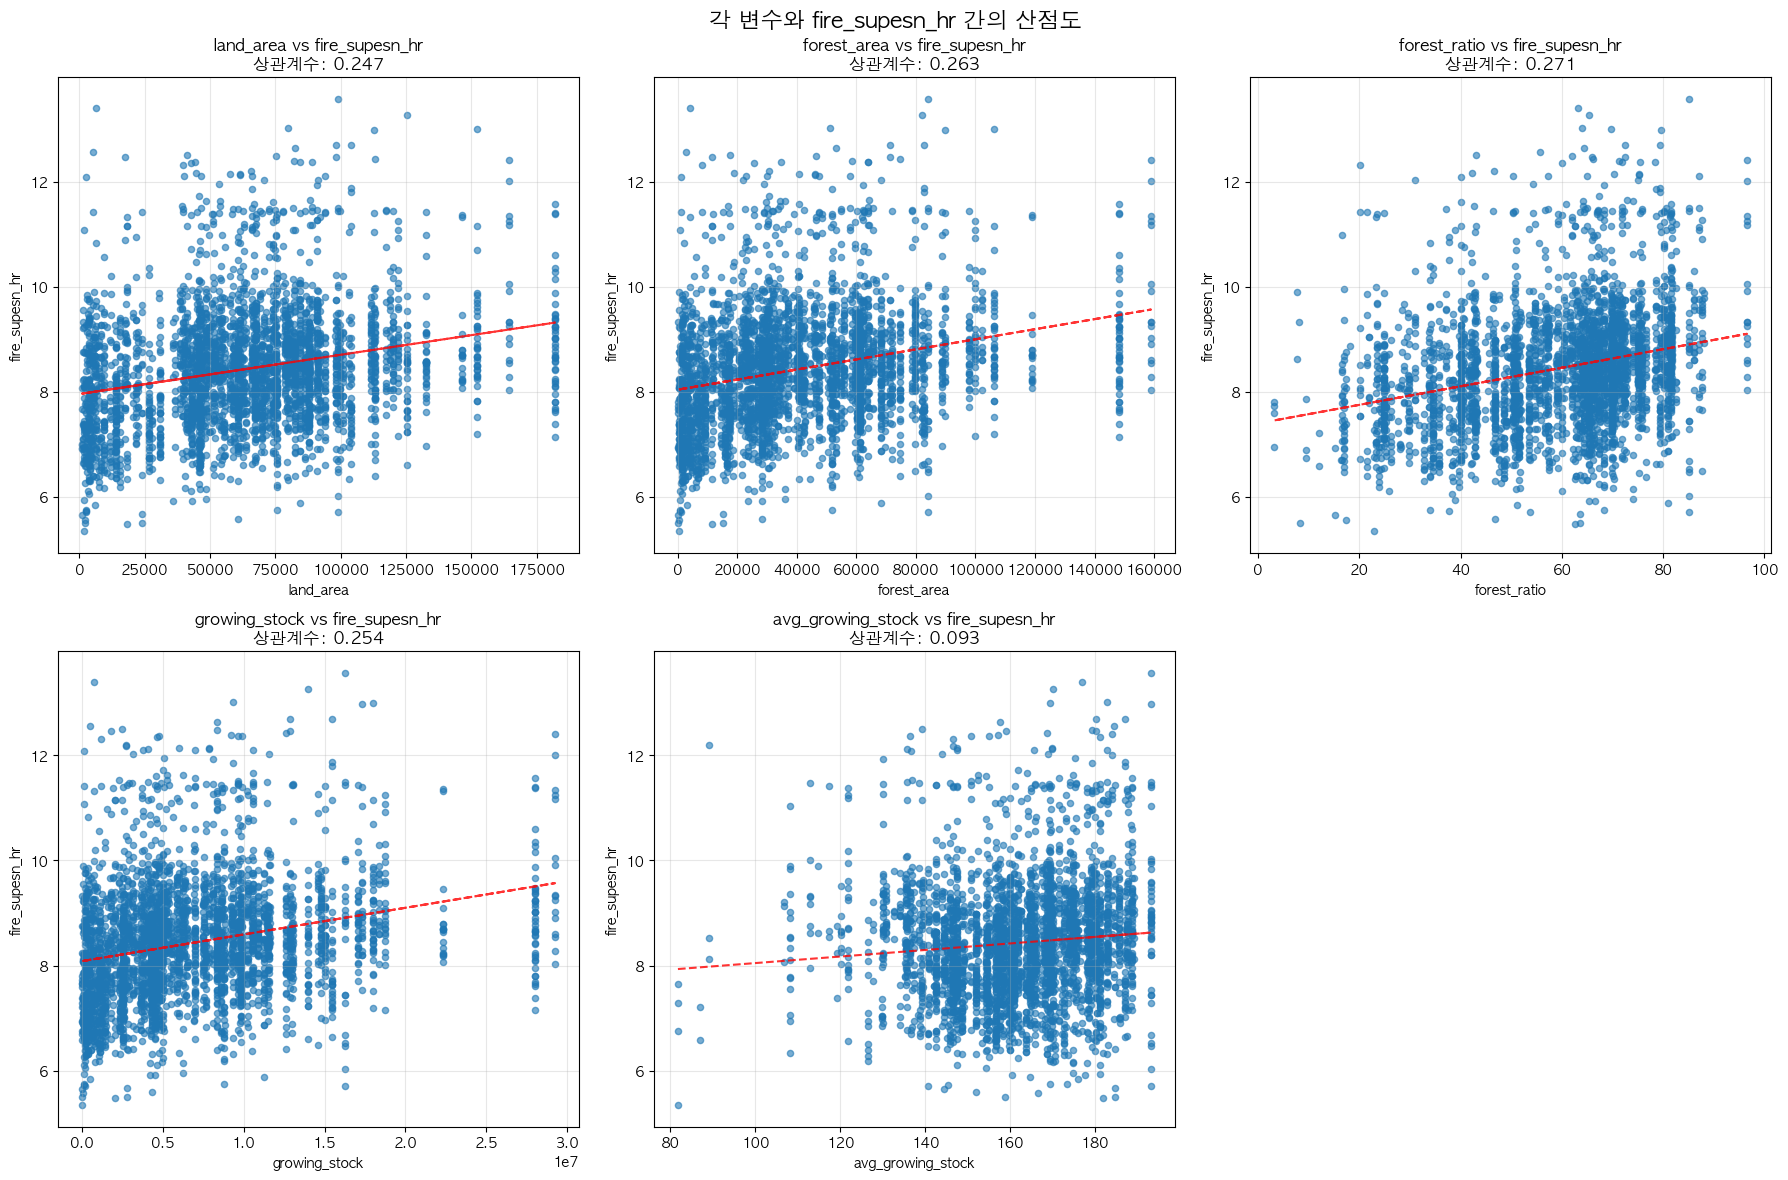


=== fire_supesn_hr와의 상관계수 통계적 유의성 검정 ===
land_area:
  상관계수: 0.2466
  p-value: 0.000000
  통계적 유의성: 유의함

forest_area:
  상관계수: 0.2629
  p-value: 0.000000
  통계적 유의성: 유의함

forest_ratio:
  상관계수: 0.2708
  p-value: 0.000000
  통계적 유의성: 유의함

growing_stock:
  상관계수: 0.2540
  p-value: 0.000000
  통계적 유의성: 유의함

avg_growing_stock:
  상관계수: 0.0931
  p-value: 0.000000
  통계적 유의성: 유의함



In [6]:
# ... existing code ...

# 상관관계 분석을 위한 변수 선택
independent_vars = ['land_area', 'forest_area', 'forest_ratio', 'growing_stock', 'avg_growing_stock']
dependent_var = 'fire_supesn_hr'

# 상관계수 계산
correlation_data = df[independent_vars + [dependent_var]]
correlation_matrix = correlation_data.corr()

print("=== 상관계수 테이블 ===")
print(correlation_matrix[dependent_var].sort_values(ascending=False))

print(f"\n=== {dependent_var}와의 상관계수 (절댓값 기준 내림차순) ===")
correlations_with_target = correlation_matrix[dependent_var].abs().sort_values(ascending=False)
for var in correlations_with_target.index:
    if var != dependent_var:
        corr_value = correlation_matrix.loc[var, dependent_var]
        print(f"{var}: {corr_value:.4f}")

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0, 
            square=True,
            fmt='.3f',
            cbar_kws={'label': '상관계수'})

plt.title(f'선택된 변수들과 {dependent_var} 간의 상관관계 히트맵', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 산점도와 회귀선
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'각 변수와 {dependent_var} 간의 산점도', fontsize=16, fontweight='bold')

for i, var in enumerate(independent_vars):
    row = i // 3
    col_idx = i % 3
    
    # 산점도
    axes[row, col_idx].scatter(df[var], df[dependent_var], alpha=0.6, s=20)
    
    # 회귀선 추가
    z = np.polyfit(df[var], df[dependent_var], 1)
    p = np.poly1d(z)
    axes[row, col_idx].plot(df[var], p(df[var]), "r--", alpha=0.8)
    
    # 상관계수 표시
    corr_val = correlation_matrix.loc[var, dependent_var]
    axes[row, col_idx].set_title(f'{var} vs {dependent_var}\n상관계수: {corr_val:.3f}', 
                                fontweight='bold')
    axes[row, col_idx].set_xlabel(var)
    axes[row, col_idx].set_ylabel(dependent_var)
    axes[row, col_idx].grid(True, alpha=0.3)

# 마지막 subplot 제거
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# 통계적 유의성 검정
print(f"\n=== {dependent_var}와의 상관계수 통계적 유의성 검정 ===")
from scipy.stats import pearsonr

for var in independent_vars:
    corr_coef, p_value = pearsonr(df[var], df[dependent_var])
    significance = "유의함" if p_value < 0.05 else "유의하지 않음"
    print(f"{var}:")
    print(f"  상관계수: {corr_coef:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  통계적 유의성: {significance}")
    print()

=== impute_radius 컬럼 분석 ===
데이터 타입: int64
고유값 개수: 3
결측값 개수: 0
총 행 수: 3361

=== 기본 통계 ===
평균: 0.0690
표준편차: 0.2717
최소값: 0.0000
최대값: 2.0000

=== 분포 시각화 ===


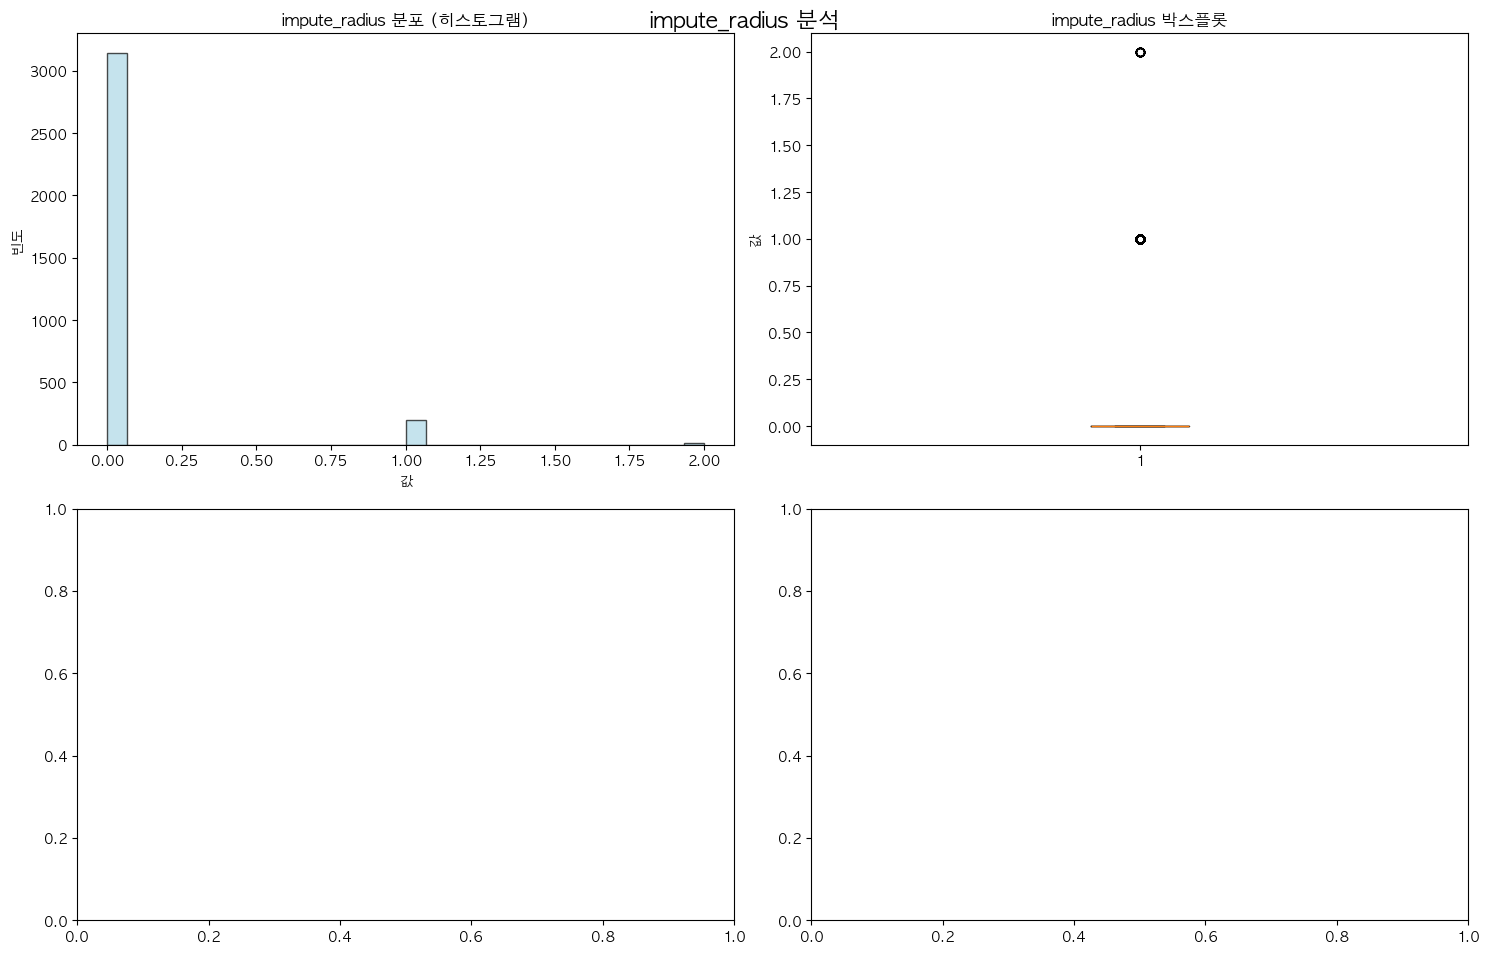


=== 값 분포 상세 정보 ===
상위 10개 값:
  0: 3145개 (93.6%)
  1: 200개 (6.0%)
  2: 16개 (0.5%)


In [7]:
# ... existing code ...

# impute_radius 컬럼 분석
col_name = 'impute_radius'

print(f"=== {col_name} 컬럼 분석 ===")

# 1. 기본 정보 확인
if col_name in df.columns:
    print(f"데이터 타입: {df[col_name].dtype}")
    print(f"고유값 개수: {df[col_name].nunique()}")
    print(f"결측값 개수: {df[col_name].isnull().sum()}")
    print(f"총 행 수: {len(df)}")
    
    # 기본 통계
    print(f"\n=== 기본 통계 ===")
    print(f"평균: {df[col_name].mean():.4f}")
    print(f"표준편차: {df[col_name].std():.4f}")
    print(f"최소값: {df[col_name].min():.4f}")
    print(f"최대값: {df[col_name].max():.4f}")
    
    # 2. 분포 시각화
    print(f"\n=== 분포 시각화 ===")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{col_name} 분석', fontsize=16, y=0.95)
    
    # 히스토그램
    axes[0, 0].hist(df[col_name].dropna(), bins=30, alpha=0.7, edgecolor='black', color='lightblue')
    axes[0, 0].set_title(f'{col_name} 분포 (히스토그램)', fontsize=12)
    axes[0, 0].set_xlabel('값')
    axes[0, 0].set_ylabel('빈도')
    
    # 박스플롯
    axes[0, 1].boxplot(df[col_name].dropna())
    axes[0, 1].set_title(f'{col_name} 박스플롯', fontsize=12)
    axes[0, 1].set_ylabel('값')
    
    # 3. 종속변수와의 관계
    dependent_var = 'FIRE_SUPESN_HR'
    
    if dependent_var in df.columns:
        # 결측값이 있는 행 제거
        df_clean = df[[col_name, dependent_var]].dropna()
        
        # 상관계수 계산
        corr = df_clean[col_name].corr(df_clean[dependent_var])
        print(f"\n=== 종속변수와의 관계 ===")
        print(f"상관계수: {corr:.4f}")
        
        # 산점도
        axes[1, 0].scatter(df_clean[col_name], df_clean[dependent_var], alpha=0.6, s=20)
        axes[1, 0].set_title(f'{col_name} vs {dependent_var}\n(r = {corr:.4f})', fontsize=12)
        axes[1, 0].set_xlabel(col_name)
        axes[1, 0].set_ylabel(dependent_var)
        
        # 회귀선 추가
        z = np.polyfit(df_clean[col_name], df_clean[dependent_var], 1)
        p = np.poly1d(z)
        axes[1, 0].plot(df_clean[col_name], p(df_clean[col_name]), "r--", alpha=0.8)
        
        # 히트맵
        correlation_matrix = df_clean.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
                    square=True, ax=axes[1, 1], fmt='.4f')
        axes[1, 1].set_title('상관계수 히트맵', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # 4. 값 분포 상세 정보
    print(f"\n=== 값 분포 상세 정보 ===")
    value_counts = df[col_name].value_counts().head(10)
    print("상위 10개 값:")
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count}개 ({percentage:.1f}%)")
    
else:
    print(f"{col_name} 컬럼이 df에 존재하지 않습니다.")

# ... existing code ...